# Space Missions

This project analyzes global space missions from 1957 to the present.

## Import Needed Libraries


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore Warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv('space_missions.csv', encoding='ISO-8859-1')

## Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [4]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",04/10/1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",03/11/1957,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",06/12/1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",01/02/1958,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",05/02/1958,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [5]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

The dataset contains 4630 entries and 9 columns. All columns are of type object:

- `Company`: Name of the company responsible for the mission.
- `Location`: Launch site location.
- `Date`: Date of the mission.
- `Time`: Time of the mission.
- `Rocket`: Name of the rocket.
- `Mission`: Name or description of the mission.
- `RocketStatus`: Status of the rocket.
- `Price`: Cost of the mission.
- `MissionStatus`: Status of the mission.

## Data Cleaning and Preparation

In [6]:
# Generate basic descriptive statistics for numerical columns
descriptive_stats = df.describe(include='all')

descriptive_stats

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",26/04/1962,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


- `Company`: 62 unique companies, most frequent is "RVSN USSR".
- `Location`: 158 unique locations, most frequent is "Site 31/6, Baikonur Cosmodrome, Kazakhstan".
- `Date`: 4180 unique dates, most frequent date is "26/04/1962" occurring 4 times.
- `Time`: 1300 unique times, most frequent time is "12:00:00" occurring 52 times.
- `Rocket`: 370 unique rockets, most frequent is "Cosmos-3M (11K65M)".
- `Mission`: 4556 unique missions, most frequent is "DSP".
- `RocketStatus`: 2 unique statuses (Retired, Active), most frequent is "Retired".
- `Price`: 65 unique prices, most frequent is "450".
- `MissionStatus`: 4 unique statuses, most frequent is "Success" (4162 occurrences).

In [7]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

- `Time`: 127 missing values.
- `Price`: 3365 missing values (majority missing).

In [8]:
# Fill missing Time values with "00:00:00"
df['Time'].fillna('00:00:00', inplace=True)

df

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",04/10/1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",03/11/1957,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",06/12/1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",01/02/1958,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",05/02/1958,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",22/07/2022,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",24/07/2022,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",24/07/2022,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",27/07/2022,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [9]:
# Data Types Correction
# Combine Date and Time into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [10]:
# Drop the original Date and Time columns as we have a combined DateTime column now
df.drop(columns=['Date', 'Time'], inplace=True)

In [11]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

df

,Company,Location,Rocket,Mission,RocketStatus,Price,MissionStatus,DateTime
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957-10-04 19:28:00
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957-11-03 02:30:00
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard,Vanguard TV3,Retired,NaN,Failure,1957-12-06 16:44:00
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I,Explorer 1,Retired,NaN,Success,1958-02-01 03:48:00
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958-02-05 07:33:00
...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success,2022-07-22 17:39:00
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",Long March 5B,Wentian,Active,NaN,Success,2022-07-24 06:22:00
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success,2022-07-24 13:38:00
4628,CAS Space,"Jiuquan Satellite Launch Center, China",Zhongke-1A,Demo Flight,Active,NaN,Success,2022-07-27 04:12:00


In [12]:
# extract Site and Country from Location
df[['Site', 'Country']] = df['Location'].str.rsplit(', ', n=1, expand=True)

In [13]:
df.head()

,Company,Location,Rocket,Mission,RocketStatus,Price,MissionStatus,DateTime,Site,Country
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957-10-04 19:28:00,"Site 1/5, Baikonur Cosmodrome",Kazakhstan
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957-11-03 02:30:00,"Site 1/5, Baikonur Cosmodrome",Kazakhstan
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard,Vanguard TV3,Retired,NaN,Failure,1957-12-06 16:44:00,"LC-18A, Cape Canaveral AFS, Florida",USA
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I,Explorer 1,Retired,NaN,Success,1958-02-01 03:48:00,"LC-26A, Cape Canaveral AFS, Florida",USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958-02-05 07:33:00,"LC-18A, Cape Canaveral AFS, Florida",USA


## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [14]:
# Generate summary statistics for categorical columns (object type)
categorical_stats = df.describe(include='object')

# Generate summary statistics for datetime column
datetime_stats = df['DateTime'].describe()

(categorical_stats, datetime_stats)

(          Company                                    Location  \
 count        4629                                        4629   
 unique         62                                         158   
 top     RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
 freq         1777                                         251   
 
                     Rocket Mission RocketStatus Price MissionStatus  \
 count                 4629    4629         4629  1264          4629   
 unique                 370    4556            2    65             4   
 top     Cosmos-3M (11K65M)     DSP      Retired   450       Success   
 freq                   446       8         3620   136          4161   
 
                                   Site Country  
 count                             4629    4629  
 unique                             158      22  
 top     Site 31/6, Baikonur Cosmodrome     USA  
 freq                               251    1467  ,
 count                             4629
 mean     1990-

- `Company`: 62 unique companies, with "RVSN USSR" being the most frequent (1777 occurrences).
- `Location`: 158 unique locations, with "Site 31/6, Baikonur Cosmodrome, Kazakhstan" being the most frequent (251 occurrences).
- `Rocket`: 370 unique rockets, with "Cosmos-3M (11K65M)" being the most frequent (446 occurrences).
- `Mission`: 4556 unique missions, with "DSP" being the most frequent (8 occurrences).
- `RocketStatus`: 2 unique statuses (Retired, Active), with "Retired" being the most frequent (3620 occurrences).
- `Price`: 65 unique prices, with "450" being the most frequent (136 occurrences).
- `MissionStatus`: 4 unique statuses, with "Success" being the most frequent (4161 occurrences).
- `City`: 158 unique cities, with "Site 31/6, Baikonur Cosmodrome" being the most frequent (251 occurrences).
- `Country`: 22 unique countries, with "USA" being the most frequent (1467 occurrences).

Datetime Column
- `DateTime`:
  - First mission date: 1957-10-04 19:28:00
  - Last mission date: 2022-07-29 13:28:00
  - Most frequent date and time: 1990-02-07 01:33:00 (2 occurrences)

### Distribution Analysis

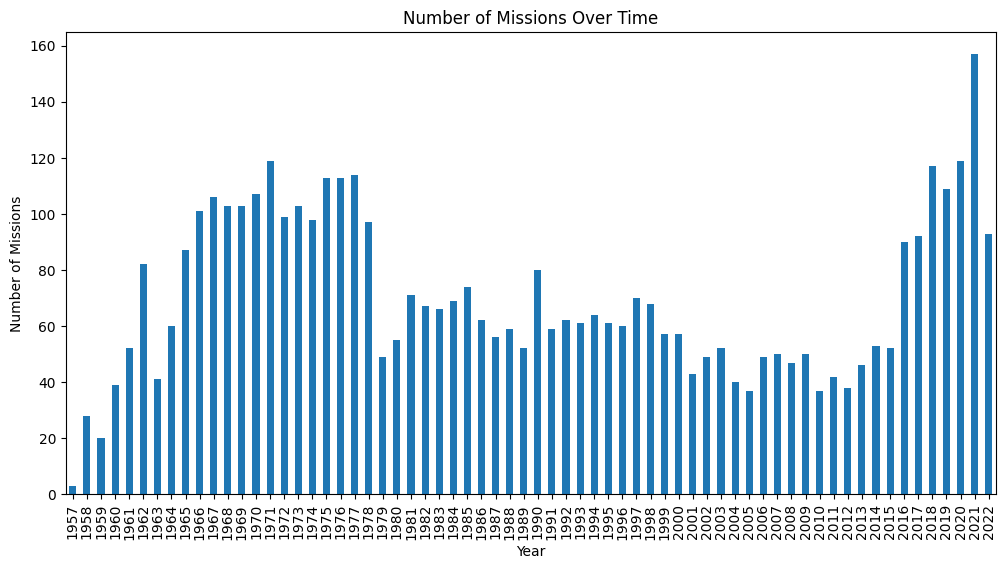

In [15]:
# Distribution of DateTime (missions over time)
plt.figure(figsize=(12, 6))
df['DateTime'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Missions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.show()

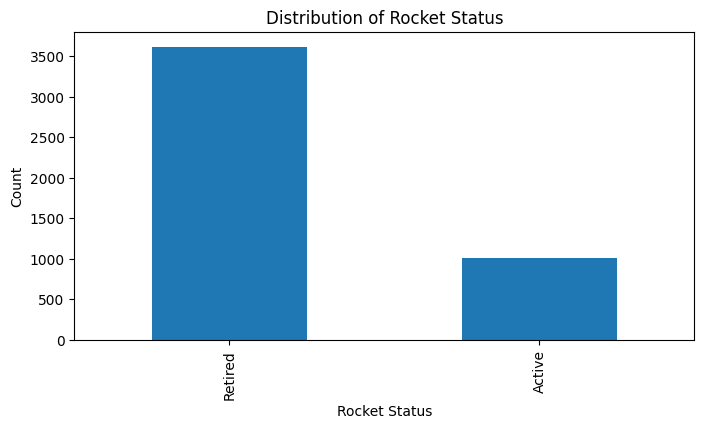

In [16]:
# Distribution of RocketStatus
plt.figure(figsize=(8, 4))
df['RocketStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Rocket Status')
plt.xlabel('Rocket Status')
plt.ylabel('Count')
plt.show()

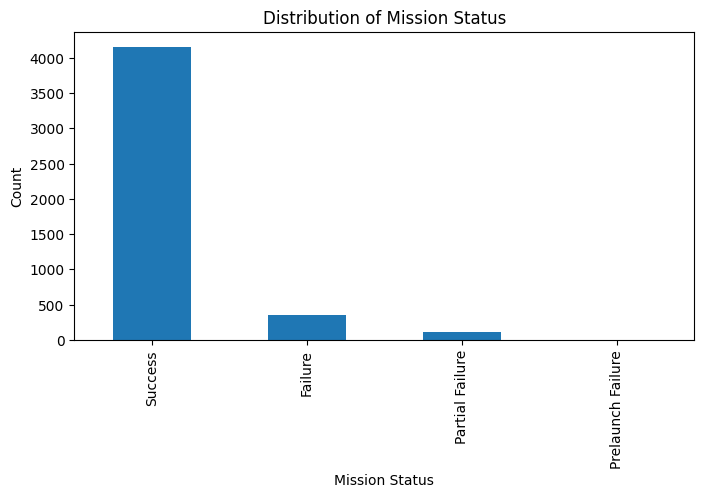

In [17]:
# Distribution of MissionStatus
plt.figure(figsize=(8, 4))
df['MissionStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.show()

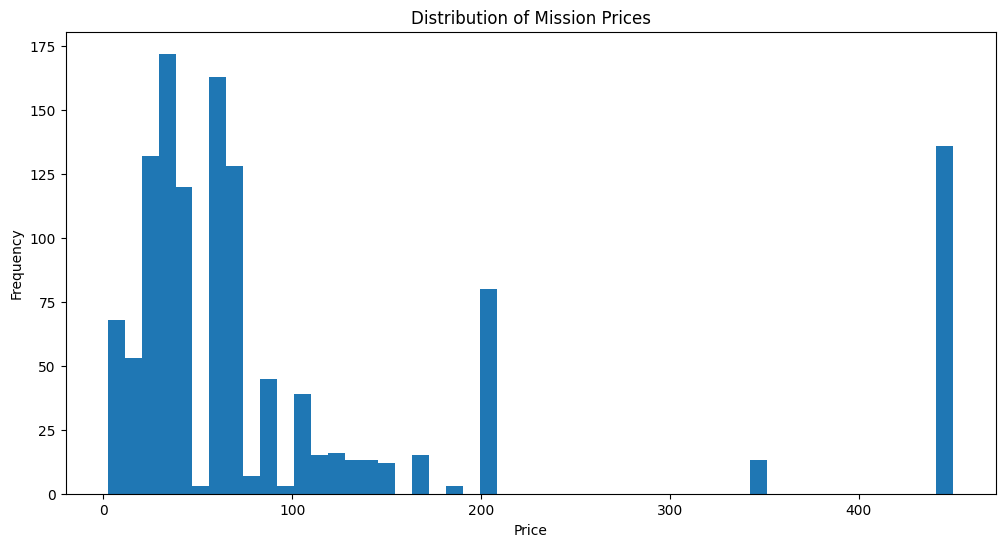

In [18]:
# Distribution of Price (only plotting non-null values)
plt.figure(figsize=(12, 6))
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].dropna().plot(kind='hist', bins=50)
plt.title('Distribution of Mission Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Categorical Analysis

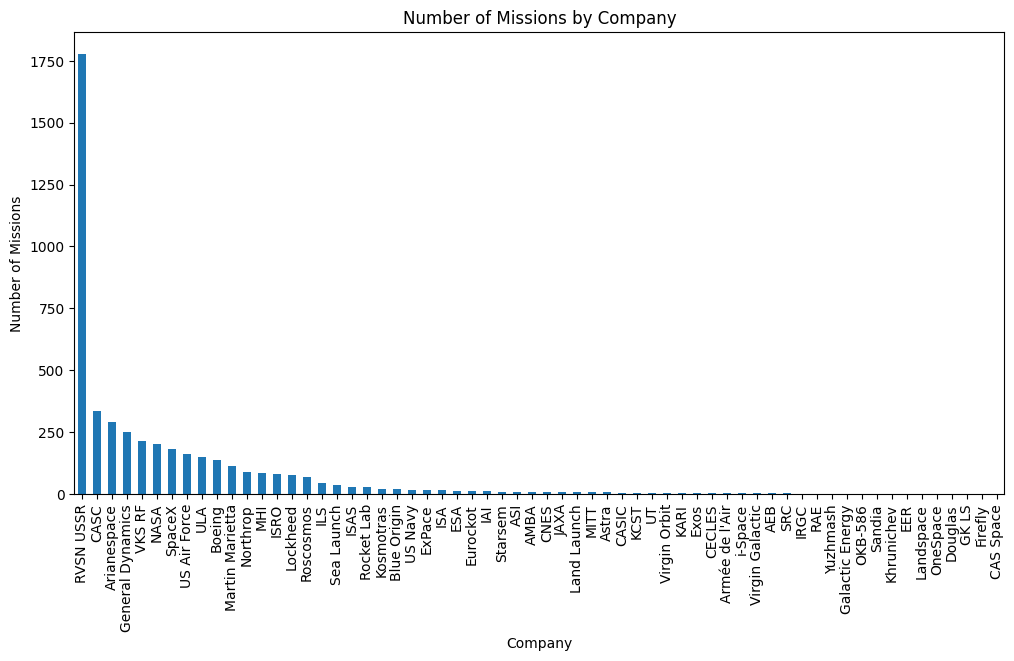

In [19]:
# Number of Missions by Company
plt.figure(figsize=(12, 6))
df['Company'].value_counts().plot(kind='bar')
plt.title('Number of Missions by Company')
plt.xlabel('Company')
plt.ylabel('Number of Missions')
plt.show()

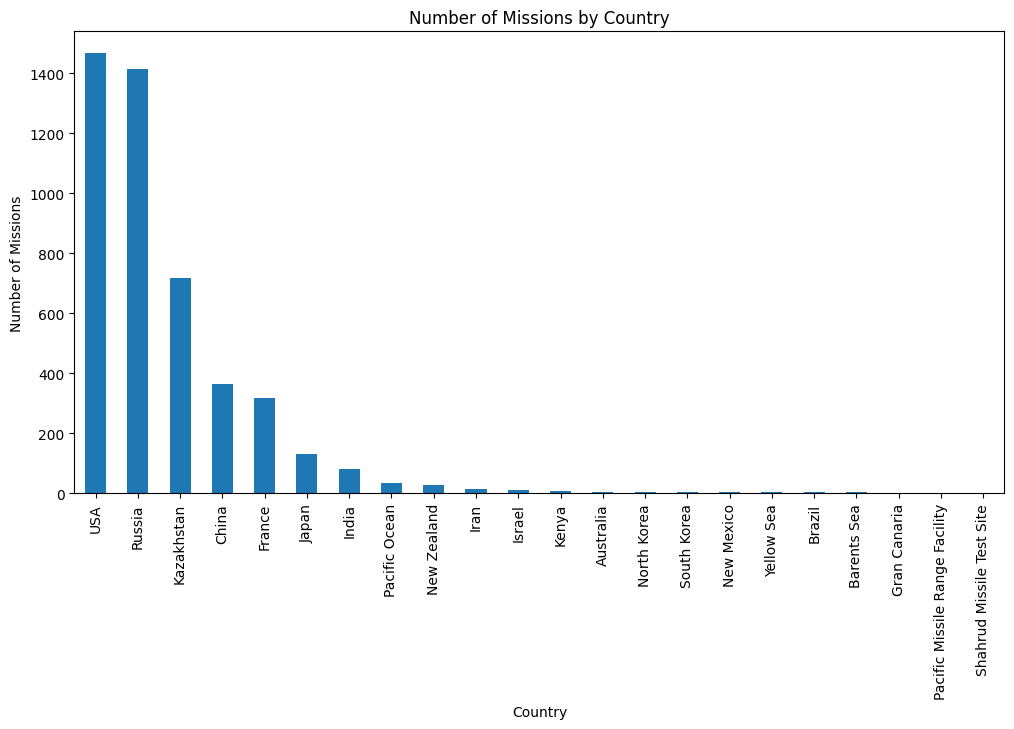

In [20]:
# Number of Missions by Country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar')
plt.title('Number of Missions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missions')
plt.show()

### Success Rate by Company

In [21]:
company_success_rate = df.groupby('Company')['MissionStatus'].apply(lambda x: (x == 'Success').mean()).reset_index()
company_success_rate.columns = ['Company', 'SuccessRate']

company_success_rate.head()

,Company,SuccessRate
0,AEB,0.000000
1,AMBA,0.500000
2,ASI,1.000000
3,Arianespace,0.962457
4,Armée de l'Air,0.750000


In [22]:
company_success_rate.to_csv('company_success_rate.csv', index=False)

### Success rate by Country

In [23]:
country_success_rate = df.groupby('Country')['MissionStatus'].apply(lambda x: (x == 'Success').mean()).reset_index()
country_success_rate.columns = ['Country', 'SuccessRate']

country_success_rate.head()

,Country,SuccessRate
0,Australia,0.500000
1,Barents Sea,0.666667
2,Brazil,0.000000
3,China,0.917582
4,France,0.940252


In [24]:
country_success_rate.to_csv('country_success_rate.csv', index=False)

### Trends in Rocket Development

In [25]:
# Extract the year from the DateTime column
df['Year'] = df['DateTime'].dt.year

# Group by Rocket and Year, and count the number of missions
rocket_trends = df.groupby(['Rocket', 'Year']).size().reset_index(name='MissionCount')

rocket_trends.head()

,Rocket,Year,MissionCount
0,ASLV,1987,1
1,ASLV,1988,1
2,ASLV,1989,1
3,ASLV,1994,1
4,Angara 1.2,2014,1


### Geographical Distribution

In [26]:
# Prepare data for map visualization by ensuring we have valid City and Country data
geographical_data = df[['Site', 'Country', 'DateTime']].drop_duplicates()

geographical_data.head()

,Site,Country,DateTime
0,"Site 1/5, Baikonur Cosmodrome",Kazakhstan,1957-10-04 19:28:00
1,"Site 1/5, Baikonur Cosmodrome",Kazakhstan,1957-11-03 02:30:00
2,"LC-18A, Cape Canaveral AFS, Florida",USA,1957-12-06 16:44:00
3,"LC-26A, Cape Canaveral AFS, Florida",USA,1958-02-01 03:48:00
4,"LC-18A, Cape Canaveral AFS, Florida",USA,1958-02-05 07:33:00
